In [36]:
library('Seurat')
library('tidyverse')

In [37]:
# https://www.10xgenomics.com/datasets/20-k-mixture-of-nsclc-dt-cs-from-7-donors-3-v-3-1-3-1-standard-6-1-0

In [38]:
nsclc_m <- Read10X_h5("C:/Users/nidhi/Documents/scRNAseq/20k_NSCLC_DTC_3p_nextgem_Multiplex_count_raw_feature_bc_matrix.h5")

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [39]:
str(nsclc_m)

List of 3
 $ Gene Expression     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:75593104] 184 7502 9727 10485 13480 21902 24894 25667 28658 31547 ...
  .. ..@ p       : int [1:3862364] 0 0 0 12 14 14 21 21 25 25 ...
  .. ..@ Dim     : int [1:2] 36601 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
  .. ..@ x       : num [1:75593104] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ Antibody Capture    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:1159120] 8 4 3 1 1 0 3 0 3 1 ...
  .. ..@ p       : int [1:3862364] 0 0 0 0 0 0 1 1 1 2 ...
  .. ..@ Dim     : int [1:2] 9 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:9] "CD3" "CD4.1" "CD8" "CD11c" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "

In [40]:
cts <- nsclc_m$`Gene Expression`
cts[0:5,0:3]

5 x 3 sparse Matrix of class "dgCMatrix"
            AAACCCAAGAAACACT-1 AAACCCAAGAAACCAT-1 AAACCCAAGAAACCCA-1
MIR1302-2HG                  .                  .                  .
FAM138A                      .                  .                  .
OR4F5                        .                  .                  .
AL627309.1                   .                  .                  .
AL627309.3                   .                  .                  .

In [41]:
nsclc.sobj <- CreateSeuratObject(counts = cts, project="nsclc_test",min.cells=3,min.features=200)
View(nsclc.sobj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACCCAAGAATTTGG-1,nsclc_test,1333,789
AAACCCAAGAGATTCA-1,nsclc_test,295,251
AAACCCAAGATTGACA-1,nsclc_test,470,361
AAACCCAAGCAAATCA-1,nsclc_test,296,248
AAACCCAAGCAATTCC-1,nsclc_test,364,301
AAACCCAAGCACTGGA-1,nsclc_test,40874,6396
AAACCCAAGCATGGGT-1,nsclc_test,13137,3885
AAACCCAAGCCGTTGC-1,nsclc_test,260,225
AAACCCAAGCCTCCAG-1,nsclc_test,4110,428


In [42]:
##### QC of raw counts #####
# 1. % MT

In [43]:
nsclc.sobj[["mt_percent"]] <- PercentageFeatureSet(nsclc.sobj, pattern="^MT-")
View(nsclc.sobj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,mt_percent
,<fct>,<dbl>,<int>,<dbl>
AAACCCAAGAATTTGG-1,nsclc_test,1333,789,11.102776
AAACCCAAGAGATTCA-1,nsclc_test,295,251,4.406780
AAACCCAAGATTGACA-1,nsclc_test,470,361,2.127660
AAACCCAAGCAAATCA-1,nsclc_test,296,248,2.364865
AAACCCAAGCAATTCC-1,nsclc_test,364,301,2.472527
AAACCCAAGCACTGGA-1,nsclc_test,40874,6396,5.766502
AAACCCAAGCATGGGT-1,nsclc_test,13137,3885,2.542437
AAACCCAAGCCGTTGC-1,nsclc_test,260,225,1.923077
AAACCCAAGCCTCCAG-1,nsclc_test,4110,428,7.858881


Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


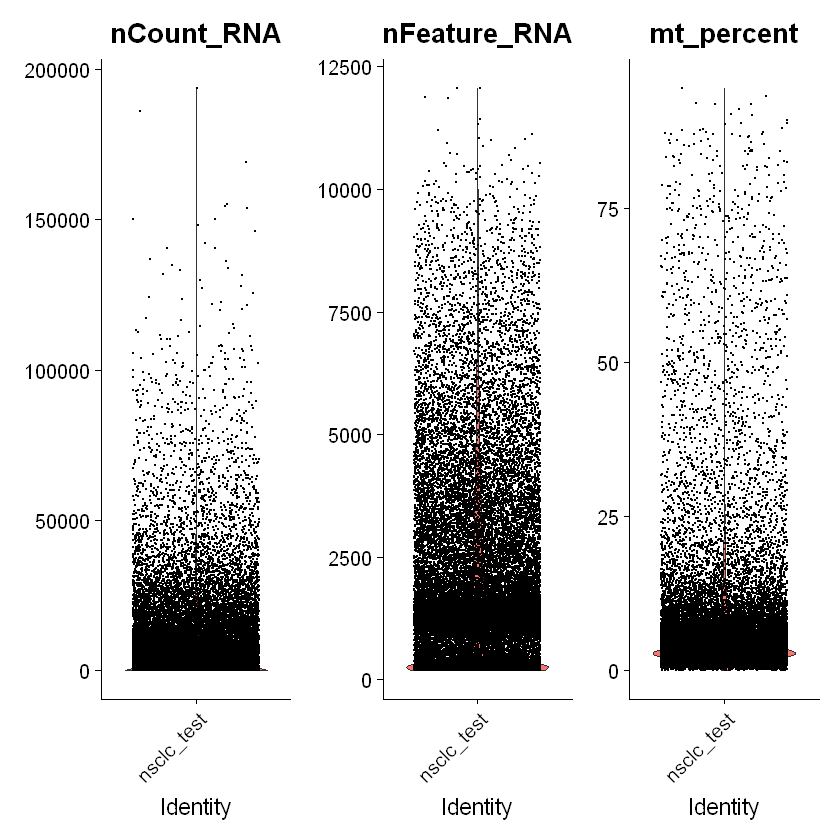

In [44]:
VlnPlot(nsclc.sobj,features=c("nCount_RNA", "nFeature_RNA", "mt_percent"), ncol=3)

In [45]:
# A lot of cells with large num of molecules detected
# A lot of cells with large high %mt count

`geom_smooth()` using formula = 'y ~ x'


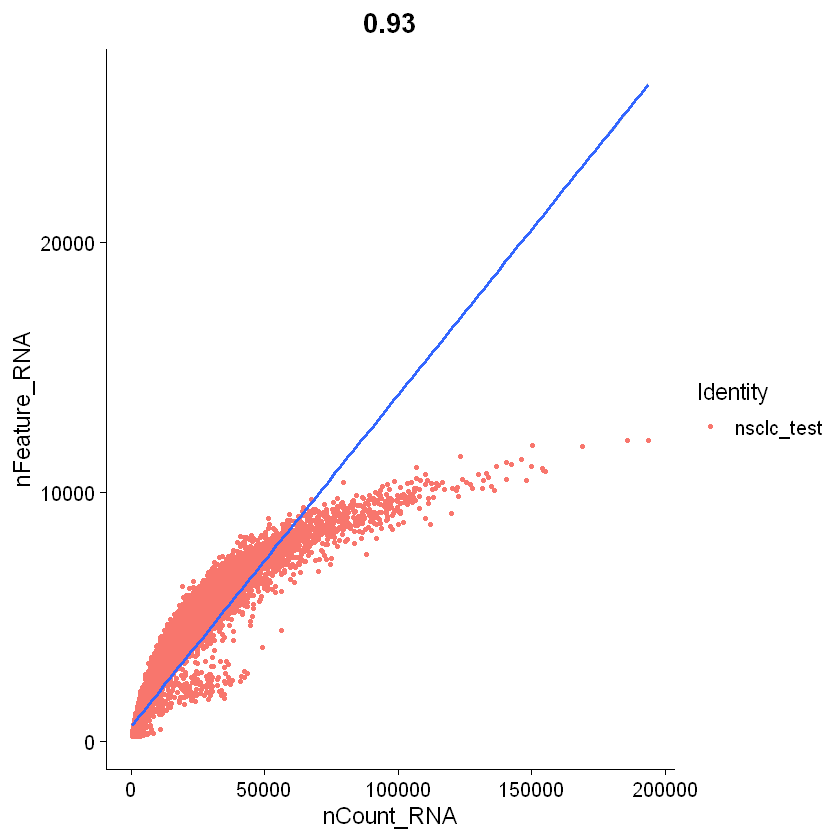

In [46]:
FeatureScatter(nsclc.sobj, feature1="nCount_RNA", feature2="nFeature_RNA") + geom_smooth(method='lm')

In [47]:
# good quality cells should have high number of genes AND high number of moleculesor counts
# Lower right corner: captured a few number of genes, sequenced over and over again so has high transcript count
# Top left corner: High number of genes captured but not deeply sequenced

In [48]:
# Subset seurat obj 
nsclc.sobj
nsclc.sobj <- subset(nsclc.sobj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & mt_percent < 5 )
nsclc.sobj

An object of class Seurat 
29552 features across 42081 samples within 1 assay 
Active assay: RNA (29552 features, 0 variable features)
 1 layer present: counts

An object of class Seurat 
29552 features across 24708 samples within 1 assay 
Active assay: RNA (29552 features, 0 variable features)
 1 layer present: counts